In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the wildlife sanctuary with predators and prey.

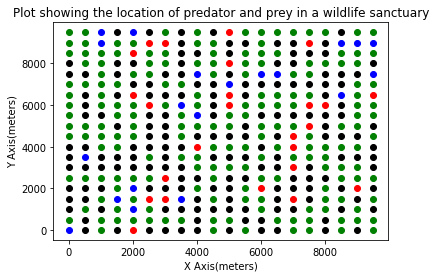

In [2]:
predator_x_coordinates=[]
predator_y_coordinates=[]
predator_gender=[]
predator_days_without_food=[]
prey_x_coordinates=[]
prey_y_coordinates=[]
prey_gender=[]
for i in range(20):
  for j in range(20):
    random=np.random.uniform(0,1)
    if(random<0.1):
      predator_x_coordinates.append(500*i) 
      predator_y_coordinates.append(500*j)
      gender=np.random.uniform(0,1)
      predator_days_without_food.append(0)
      if(gender>0.5):
        predator_gender.append('male')
      else:
        predator_gender.append('female')
    else:
      prey_x_coordinates.append(500*i)
      prey_y_coordinates.append(500*j)
      gender=np.random.uniform(0,1) 
      if(gender>0.5):
        prey_gender.append('male')
      else:
        prey_gender.append('female')

for i in range(len(predator_x_coordinates)):
  if(predator_gender[i]=='male'):
    plt.scatter(predator_x_coordinates[i],predator_y_coordinates[i],color='b')
  else:
    plt.scatter(predator_x_coordinates[i],predator_y_coordinates[i],color='r')

for i in range(len(prey_x_coordinates)):
  if(prey_gender[i]=='male'):
    plt.scatter(prey_x_coordinates[i],prey_y_coordinates[i],color='g')
  else:
    plt.scatter(prey_x_coordinates[i],prey_y_coordinates[i],color='k')
plt.title('Plot showing the location of predator and prey in a wildlife sanctuary')
plt.xlabel('X Axis(meters)')
plt.ylabel('Y Axis(meters)')
plt.show()

562
51


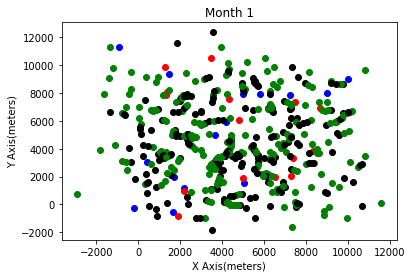

760
34


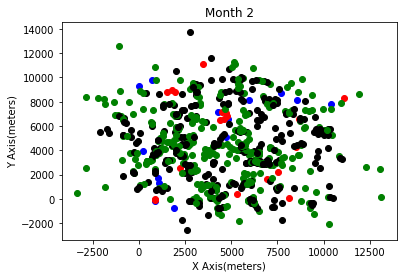

1328
34


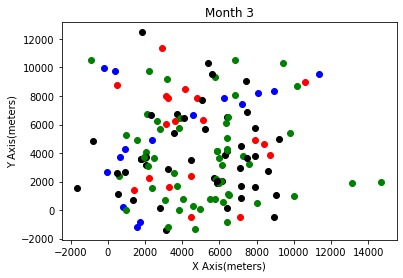

120
34


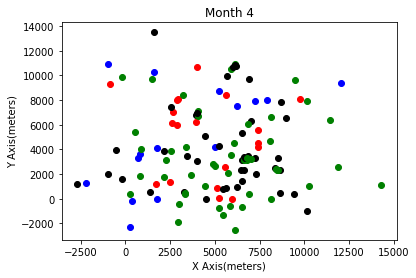

108
36


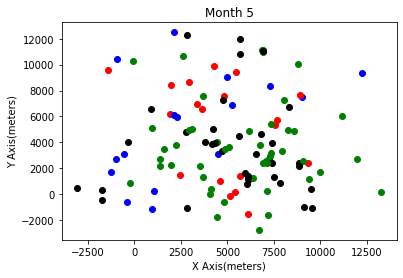

91
37


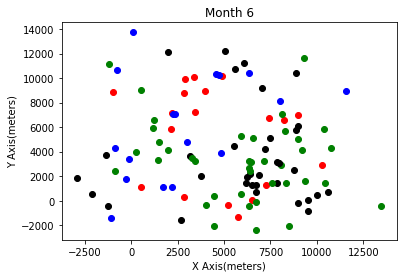

86
37


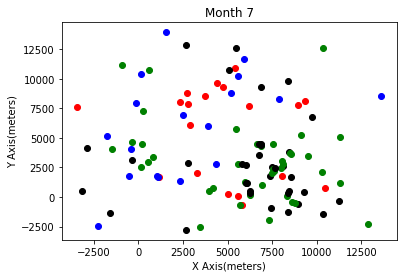

82
38


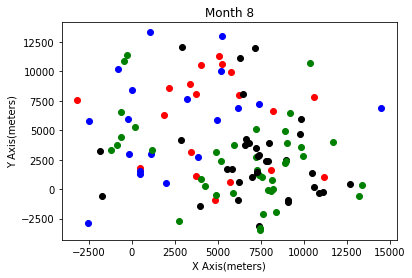

85
40


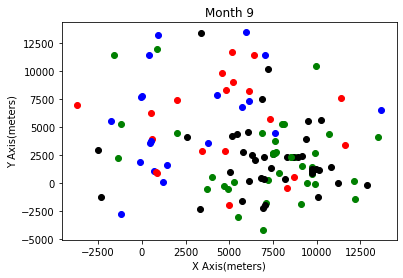

90
41


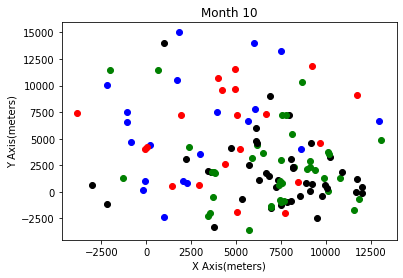

90
41


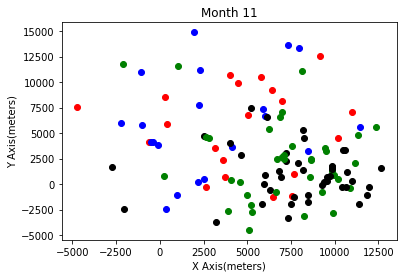

95
44


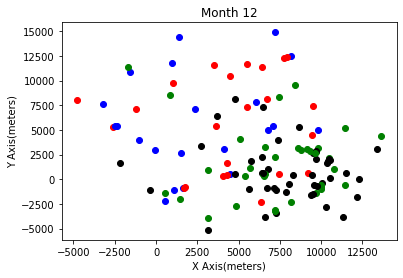

100
47


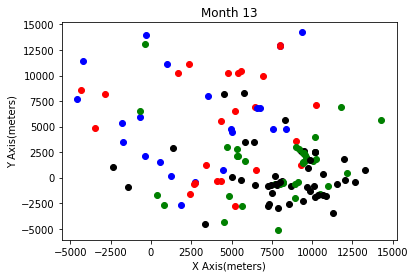

104
49


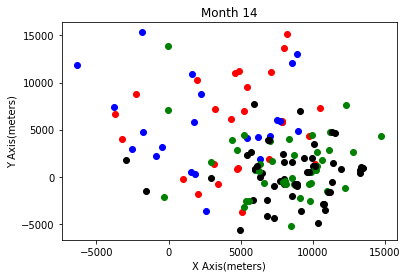

123
51


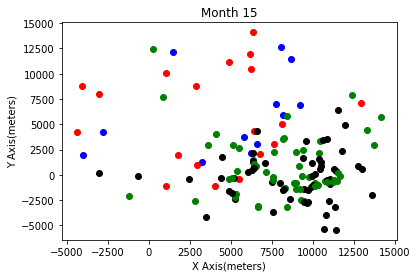

160
32


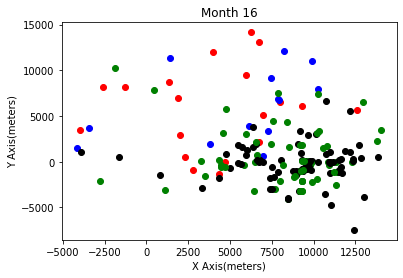

243
32


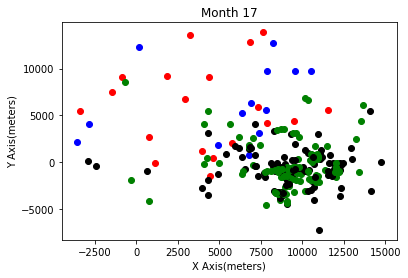

455
32


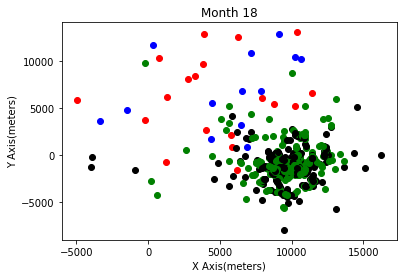

1654
33


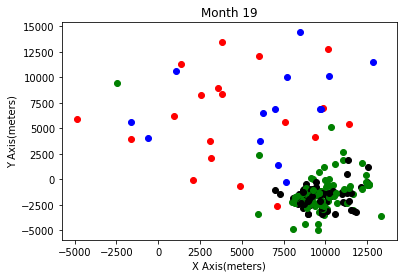

427
33


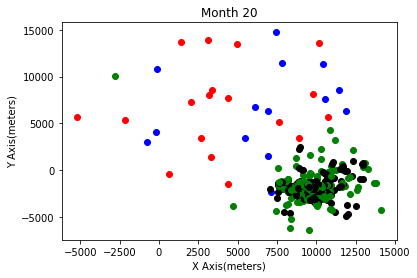

1766
33


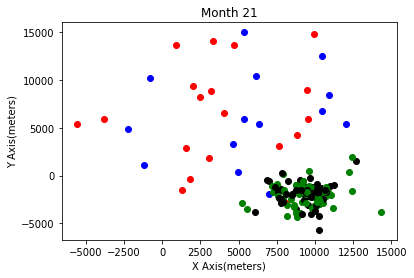

359
34


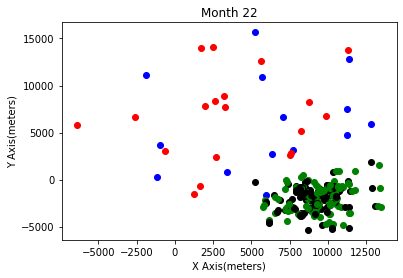

1267
35


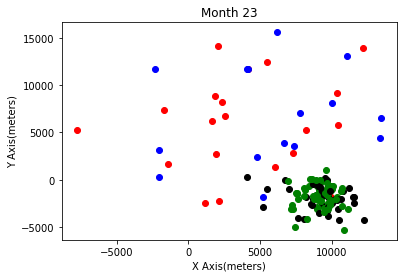

199
37


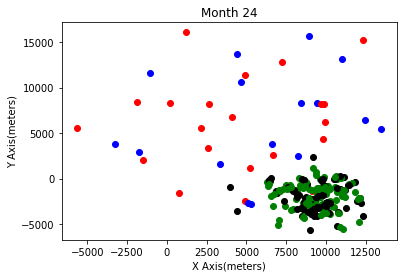

407
40


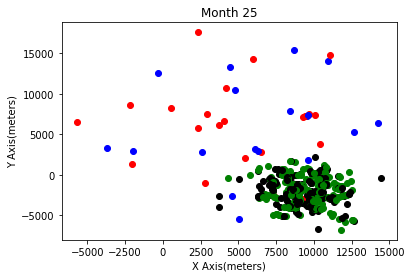

1107
43


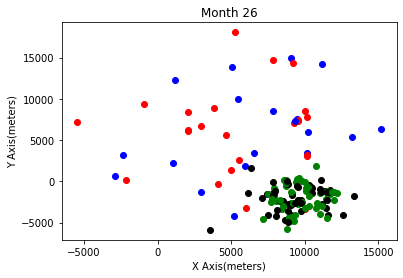

159
44


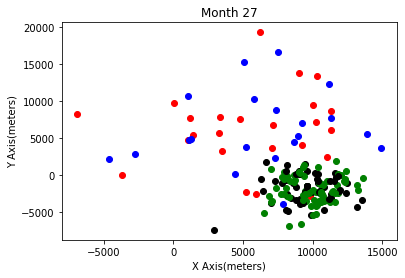

252
45


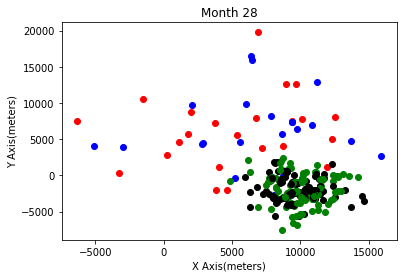

467
45


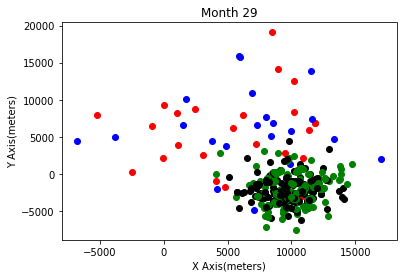

1612
45


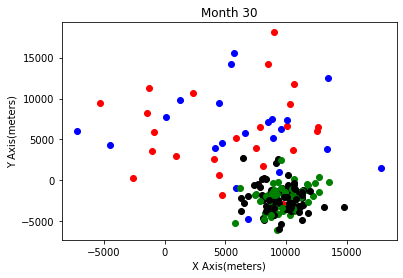

In [3]:
time=30
t=[]
num_predator=[]
num_prey=[]
for i in range(time):
  t.append(i)
for i in range(time):

  #Movement of prerdator and prey within the wildlife sanctuary.
  for j in range(len(predator_x_coordinates)):
    if(predator_gender[j]!='dead'):
      predator_x_coordinates[j]=predator_x_coordinates[j]+np.random.normal(0,1000)
      predator_y_coordinates[j]=predator_y_coordinates[j]+np.random.normal(0,1000)
      predator_days_without_food[j]=predator_days_without_food[j]+1
  for j in range(len(prey_x_coordinates)):
    if(prey_gender[j]!='dead'):
      prey_x_coordinates[j]=prey_x_coordinates[j]+np.random.normal(0,1000)
      prey_y_coordinates[j]=prey_y_coordinates[j]+np.random.normal(0,1000)

  #New individuals of the predator are born due to mating.
  new_predators_x_coordinates=[]
  new_predators_y_coordinates=[]
  new_predators_gender=[]
  new_predators_days_without_food=[]
  for j in range(len(predator_x_coordinates)):
    for k in range(j):
      if((predator_x_coordinates[j]-predator_x_coordinates[k])**2+(predator_y_coordinates[j]-predator_y_coordinates[k])**2 < 300000) and ((predator_gender[j]=='male' and predator_gender[k]=='female') or (predator_gender[k]=='male' and predator_gender[j]=='female')):
        mating=np.random.uniform(0,1)
        if(mating<1): #If a male and female meet, they mate with a certain probability.
          new_predators_x_coordinates.append((predator_x_coordinates[j]+predator_x_coordinates[k])/2)
          new_predators_y_coordinates.append((predator_y_coordinates[j]+predator_y_coordinates[k])/2)
          new_predators_days_without_food.append(0)
          gender=np.random.uniform(0,1)
          if(gender>0.5):
            new_predators_gender.append('male')
          else:
            new_predators_gender.append('female')
  for j in range(len(new_predators_x_coordinates)):
    predator_x_coordinates.append(new_predators_x_coordinates[j])
    predator_y_coordinates.append(new_predators_y_coordinates[j])
    predator_gender.append(new_predators_gender[j])
    predator_days_without_food.append(0)
  
  #Predators die due to natural factors or human factors with a probability of 0.1.
  for j in range(len(predator_x_coordinates)):
    death=np.random.uniform(0,1)
    if(death<0.00000001 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
      predator_gender[j]='dead'

  #New individuals of the prey are born due to mating.
  new_prey_x_coordinates=[]
  new_prey_y_coordinates=[]
  new_prey_gender=[]
  for j in range(len(prey_x_coordinates)):
    for k in range(j):
      if((prey_x_coordinates[j]-prey_x_coordinates[k])**2+(prey_y_coordinates[j]-prey_y_coordinates[k])**2 < 300000) and ((prey_gender[j]=='male' and prey_gender[k]=='female') or (prey_gender[k]=='male' and prey_gender[j]=='female')):
        mating=np.random.uniform(0,1)
        if(mating<1):  #If a male and female meet, they mate with a certain probability.
          new_prey_x_coordinates.append((prey_x_coordinates[j]+prey_x_coordinates[k])/2)
          new_prey_y_coordinates.append((prey_y_coordinates[j]+prey_y_coordinates[k])/2)
          gender=np.random.uniform(0,1)
          if(gender>0.5):
            new_prey_gender.append('male')
          else:
            new_prey_gender.append('female')
  for j in range(len(new_prey_x_coordinates)):
    prey_x_coordinates.append(new_prey_x_coordinates[j])
    prey_y_coordinates.append(new_prey_y_coordinates[j])
    prey_gender.append(new_prey_gender[j])

  count_prey=0
  for j in range(len(prey_x_coordinates)):
    if((prey_gender[j]=='male' or prey_gender[j]=='female')):
      count_prey=count_prey+1

  count_predator=0
  for j in range(len(predator_x_coordinates)):
    if((predator_gender[j]=='male' or predator_gender[j]=='female')):
      count_predator=count_predator+1

  print(count_prey)
  print(count_predator)
  #Prey die due to natural factors or human factors with a probability of 0.1.
  for j in range(len(prey_x_coordinates)):
    if(count_prey>850):
      death=np.random.uniform(0,1)
      if(death<0.9 and (prey_gender[j]=='male' or prey_gender[j]=='female')):
        prey_gender[j]='dead'
    else:
      death=np.random.uniform(0,1)
      if(death<0.00000001 and (prey_gender[j]=='male' or prey_gender[j]=='female')):
        prey_gender[j]='dead'
  
  num_predator.append(count_predator)
  num_prey.append(count_prey)

  #Predators die due to natural factors or human factors with a probability of 0.1.
  for j in range(len(predator_x_coordinates)):
    if(count_predator>50):
      death=np.random.uniform(0,1)
      if(death<0.4 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
        predator_gender[j]='dead'
    else:
      death=np.random.uniform(0,1)
      if(death<0.00000001 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
        predator_gender[j]='dead'  

  #Prey die due to attack from predator with a probability of 0.9.
  for j in range(len(predator_x_coordinates)):
    for k in range(len(prey_x_coordinates)):
      if (predator_x_coordinates[j]-prey_x_coordinates[k])**2+(predator_y_coordinates[j]-prey_y_coordinates[k])**2 < 500000:
        death=np.random.uniform(0,1)
        if(death<0.4 and (prey_gender[k]=='male' or prey_gender[k]=='female')):
          prey_gender[k]='dead'
          predator_days_without_food[j]=0
  
  for j in range(len(predator_x_coordinates)):
    if(predator_days_without_food[j]==4 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
      starve=np.random.uniform(0,1)
      if(starve<0.1):
        predator_gender[j]='dead'
  
  for j in range(len(predator_x_coordinates)):
    if(predator_gender[j]=='male'):
      plt.scatter(predator_x_coordinates[j],predator_y_coordinates[j],color='b')
    if(predator_gender[j]=='female'):
      plt.scatter(predator_x_coordinates[j],predator_y_coordinates[j],color='r')
    
  for j in range(len(prey_x_coordinates)):
    if(prey_gender[j]=='male'):
      plt.scatter(prey_x_coordinates[j],prey_y_coordinates[j],color='g')
    if(prey_gender[j]=='female'):
      plt.scatter(prey_x_coordinates[j],prey_y_coordinates[j],color='k')

  plt.title('Month '+str(i+1))
  plt.xlabel('X Axis(meters)')
  plt.ylabel('Y Axis(meters)')
  plt.show()

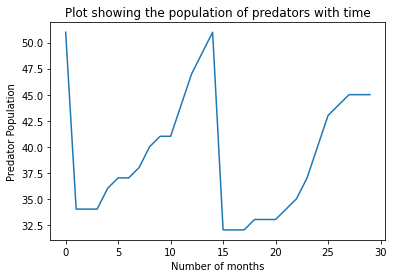

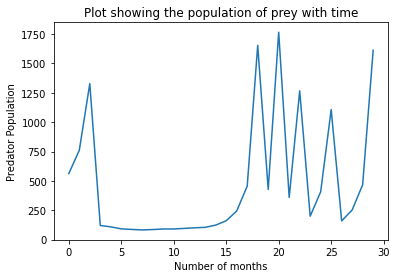

In [4]:
plt.plot(t,num_predator)
plt.xlabel('Number of months')
plt.ylabel('Predator Population')
plt.title('Plot showing the population of predators with time')
plt.show()
plt.plot(t,num_prey)
plt.xlabel('Number of months')
plt.ylabel('Predator Population')
plt.title('Plot showing the population of prey with time')
plt.show()

Effect of increase in predators

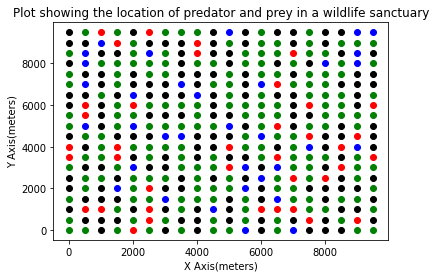

377
87


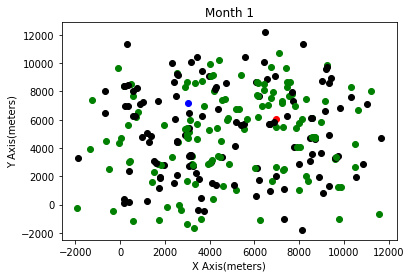

302
2


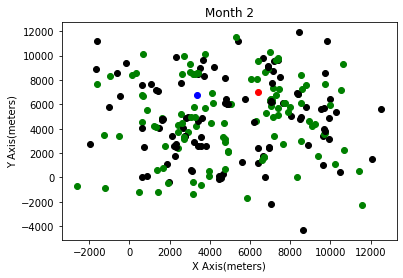

251
2


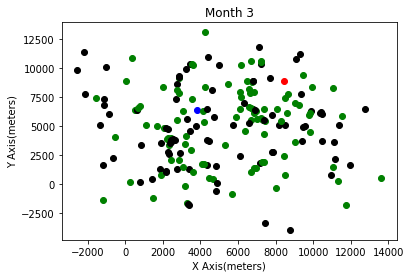

211
2


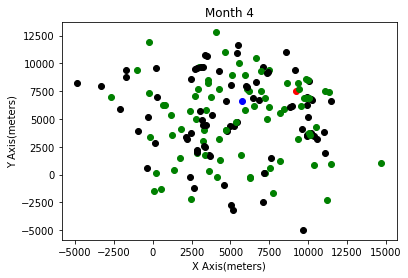

176
2


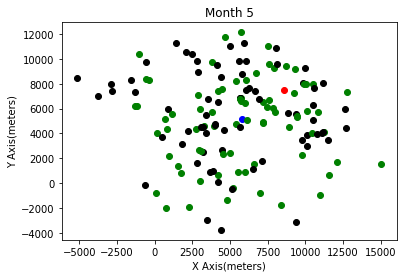

158
2


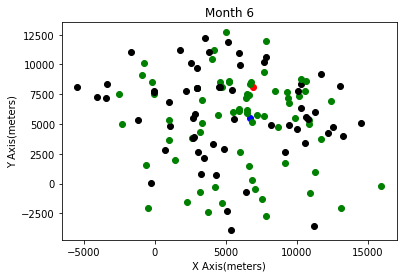

133
2


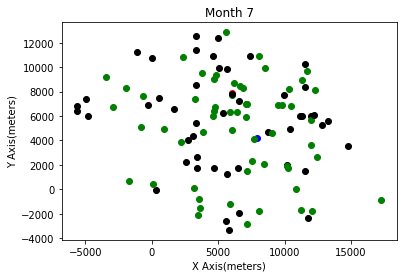

110
2


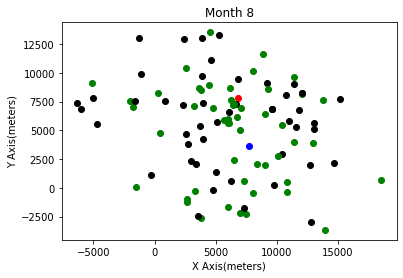

106
2


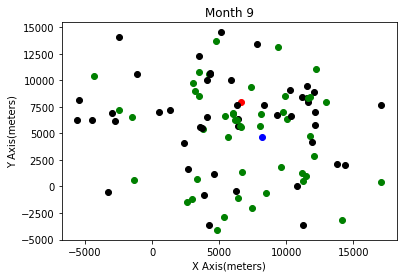

94
2


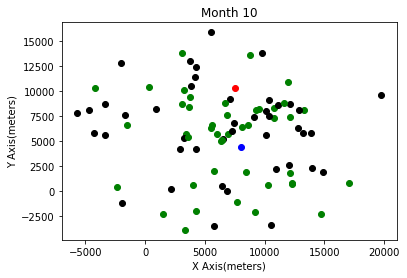

88
2


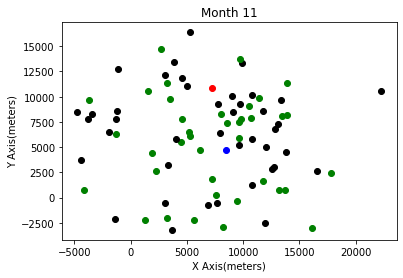

80
2


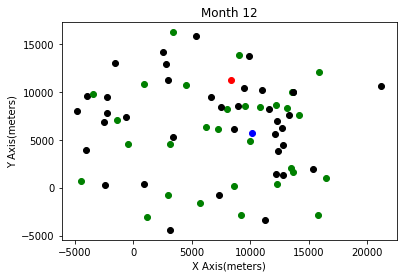

70
2


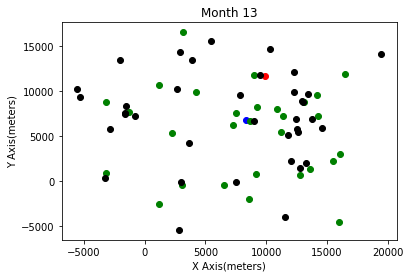

66
2


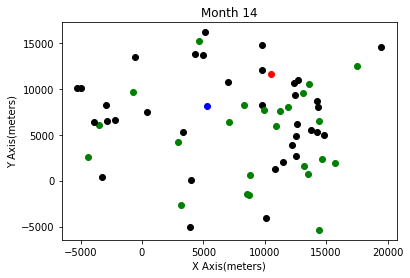

61
2


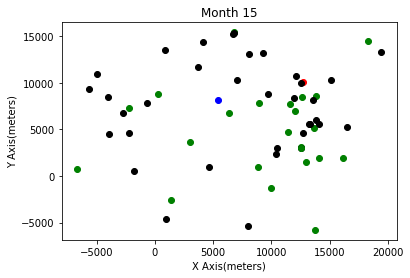

62
2


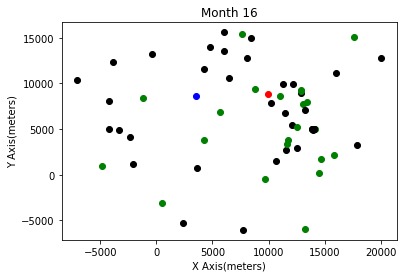

63
2


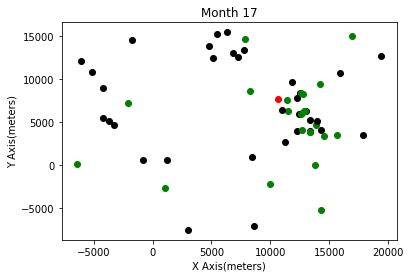

59
1


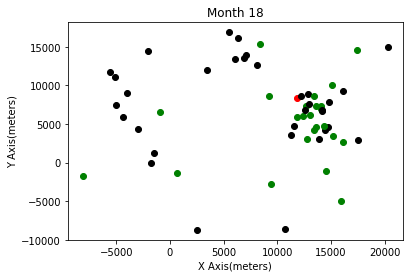

58
1


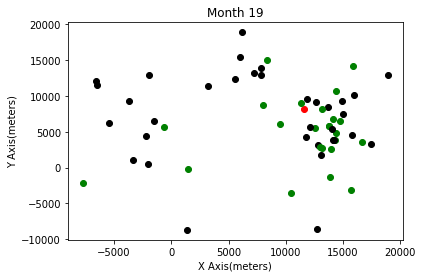

60
1


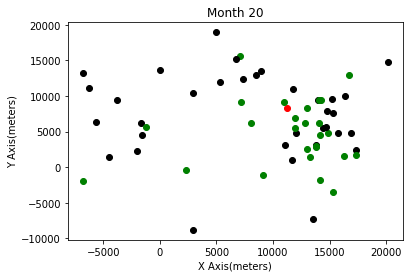

60
1


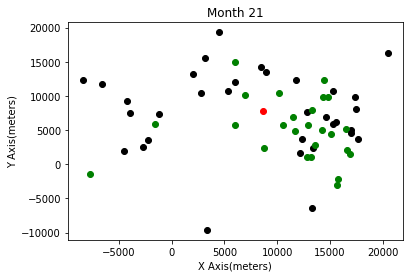

58
1


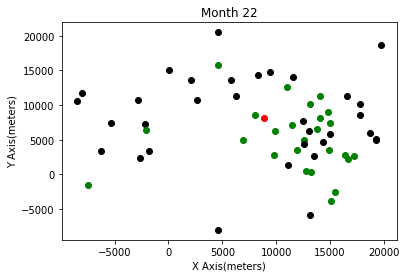

58
1


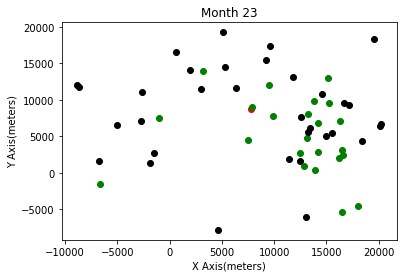

56
1


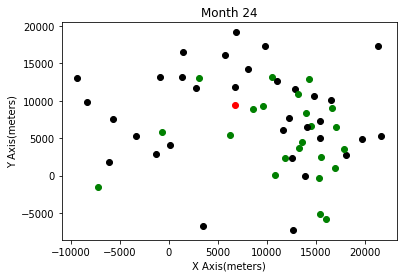

57
1


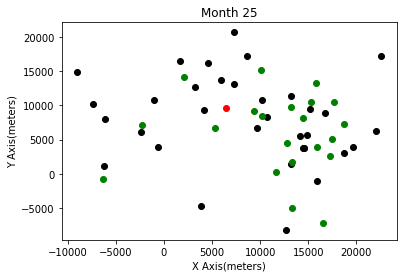

56
1


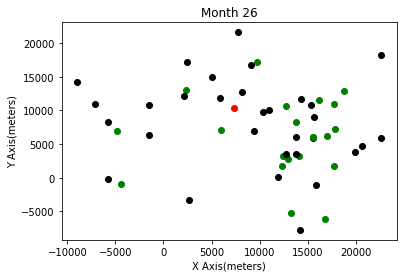

54
1


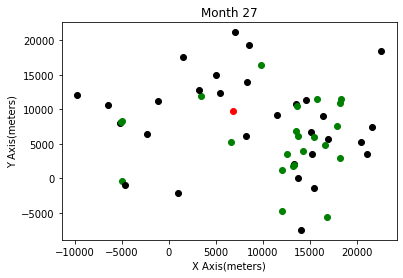

55
1


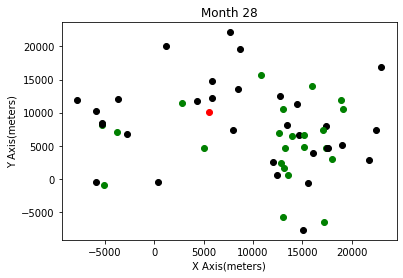

57
1


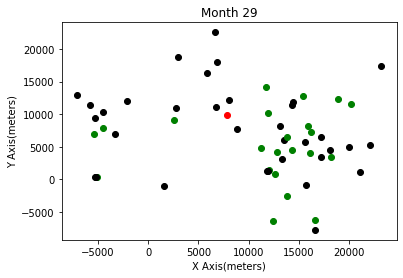

56
1


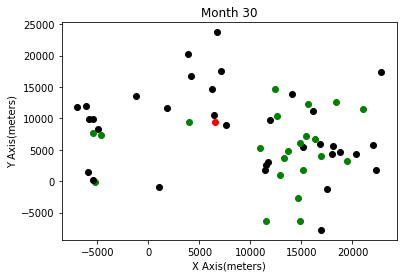

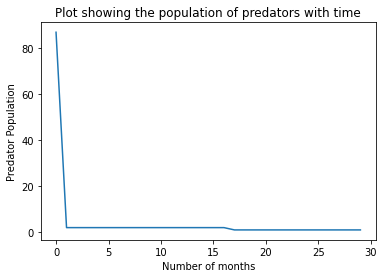

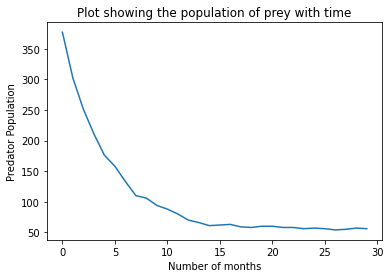

In [5]:
predator_x_coordinates=[]
predator_y_coordinates=[]
predator_gender=[]
predator_days_without_food=[]
prey_x_coordinates=[]
prey_y_coordinates=[]
prey_gender=[]
for i in range(20):
  for j in range(20):
    random=np.random.uniform(0,1)
    if(random<0.2):
      predator_x_coordinates.append(500*i) 
      predator_y_coordinates.append(500*j)
      gender=np.random.uniform(0,1)
      predator_days_without_food.append(0)
      if(gender>0.5):
        predator_gender.append('male')
      else:
        predator_gender.append('female')
    else:
      prey_x_coordinates.append(500*i)
      prey_y_coordinates.append(500*j)
      gender=np.random.uniform(0,1) 
      if(gender>0.5):
        prey_gender.append('male')
      else:
        prey_gender.append('female')

for i in range(len(predator_x_coordinates)):
  if(predator_gender[i]=='male'):
    plt.scatter(predator_x_coordinates[i],predator_y_coordinates[i],color='b')
  else:
    plt.scatter(predator_x_coordinates[i],predator_y_coordinates[i],color='r')

for i in range(len(prey_x_coordinates)):
  if(prey_gender[i]=='male'):
    plt.scatter(prey_x_coordinates[i],prey_y_coordinates[i],color='g')
  else:
    plt.scatter(prey_x_coordinates[i],prey_y_coordinates[i],color='k')
plt.title('Plot showing the location of predator and prey in a wildlife sanctuary')
plt.xlabel('X Axis(meters)')
plt.ylabel('Y Axis(meters)')
plt.show()

time=30
t=[]
num_predator=[]
num_prey=[]
for i in range(time):
  t.append(i)
for i in range(time):

  #Movement of prerdator and prey within the wildlife sanctuary.
  for j in range(len(predator_x_coordinates)):
    if(predator_gender[j]!='dead'):
      predator_x_coordinates[j]=predator_x_coordinates[j]+np.random.normal(0,1000)
      predator_y_coordinates[j]=predator_y_coordinates[j]+np.random.normal(0,1000)
      predator_days_without_food[j]=predator_days_without_food[j]+1
  for j in range(len(prey_x_coordinates)):
    if(prey_gender[j]!='dead'):
      prey_x_coordinates[j]=prey_x_coordinates[j]+np.random.normal(0,1000)
      prey_y_coordinates[j]=prey_y_coordinates[j]+np.random.normal(0,1000)

  #New individuals of the predator are born due to mating.
  new_predators_x_coordinates=[]
  new_predators_y_coordinates=[]
  new_predators_gender=[]
  new_predators_days_without_food=[]
  for j in range(len(predator_x_coordinates)):
    for k in range(j):
      if((predator_x_coordinates[j]-predator_x_coordinates[k])**2+(predator_y_coordinates[j]-predator_y_coordinates[k])**2 < 300000) and ((predator_gender[j]=='male' and predator_gender[k]=='female') or (predator_gender[k]=='male' and predator_gender[j]=='female')):
        mating=np.random.uniform(0,1)
        if(mating<1): #If a male and female meet, they mate with a certain probability.
          new_predators_x_coordinates.append((predator_x_coordinates[j]+predator_x_coordinates[k])/2)
          new_predators_y_coordinates.append((predator_y_coordinates[j]+predator_y_coordinates[k])/2)
          new_predators_days_without_food.append(0)
          gender=np.random.uniform(0,1)
          if(gender>0.5):
            new_predators_gender.append('male')
          else:
            new_predators_gender.append('female')
  for j in range(len(new_predators_x_coordinates)):
    predator_x_coordinates.append(new_predators_x_coordinates[j])
    predator_y_coordinates.append(new_predators_y_coordinates[j])
    predator_gender.append(new_predators_gender[j])
    predator_days_without_food.append(0)
  
  #Predators die due to natural factors or human factors with a probability of 0.1.
  for j in range(len(predator_x_coordinates)):
    death=np.random.uniform(0,1)
    if(death<0.00000001 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
      predator_gender[j]='dead'

  #New individuals of the prey are born due to mating.
  new_prey_x_coordinates=[]
  new_prey_y_coordinates=[]
  new_prey_gender=[]
  for j in range(len(prey_x_coordinates)):
    for k in range(j):
      if((prey_x_coordinates[j]-prey_x_coordinates[k])**2+(prey_y_coordinates[j]-prey_y_coordinates[k])**2 < 100000) and ((prey_gender[j]=='male' and prey_gender[k]=='female') or (prey_gender[k]=='male' and prey_gender[j]=='female')):
        mating=np.random.uniform(0,1)
        if(mating<1):  #If a male and female meet, they mate with a certain probability.
          new_prey_x_coordinates.append((prey_x_coordinates[j]+prey_x_coordinates[k])/2)
          new_prey_y_coordinates.append((prey_y_coordinates[j]+prey_y_coordinates[k])/2)
          gender=np.random.uniform(0,1)
          if(gender>0.5):
            new_prey_gender.append('male')
          else:
            new_prey_gender.append('female')
  for j in range(len(new_prey_x_coordinates)):
    prey_x_coordinates.append(new_prey_x_coordinates[j])
    prey_y_coordinates.append(new_prey_y_coordinates[j])
    prey_gender.append(new_prey_gender[j])

  count_prey=0
  for j in range(len(prey_x_coordinates)):
    if((prey_gender[j]=='male' or prey_gender[j]=='female')):
      count_prey=count_prey+1

  count_predator=0
  for j in range(len(predator_x_coordinates)):
    if((predator_gender[j]=='male' or predator_gender[j]=='female')):
      count_predator=count_predator+1

  print(count_prey)
  print(count_predator)
  #Prey die due to natural factors or human factors with a probability of 0.1.
  for j in range(len(prey_x_coordinates)):
    if(count_prey>850):
      death=np.random.uniform(0,1)
      if(death<0.7 and (prey_gender[j]=='male' or prey_gender[j]=='female')):
        prey_gender[j]='dead'
    else:
      death=np.random.uniform(0,1)
      if(death<0.00000001 and (prey_gender[j]=='male' or prey_gender[j]=='female')):
        prey_gender[j]='dead'
  
  num_predator.append(count_predator)
  num_prey.append(count_prey)

  #Predators die due to natural factors or human factors with a probability of 0.1.
  for j in range(len(predator_x_coordinates)):
    if(count_predator>70):
      death=np.random.uniform(0,1)
      if(death<0.95 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
        predator_gender[j]='dead'
    else:
      death=np.random.uniform(0,1)
      if(death<0.00000001 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
        predator_gender[j]='dead'  

  #Prey die due to attack from predator with a probability of 0.9.
  for j in range(len(predator_x_coordinates)):
    for k in range(len(prey_x_coordinates)):
      if (predator_x_coordinates[j]-prey_x_coordinates[k])**2+(predator_y_coordinates[j]-prey_y_coordinates[k])**2 < 500000:
        death=np.random.uniform(0,1)
        if(death<0.4 and (prey_gender[k]=='male' or prey_gender[k]=='female')):
          prey_gender[k]='dead'
          predator_days_without_food[j]=0
  
  for j in range(len(predator_x_coordinates)):
    if(predator_days_without_food[j]==4 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
      starve=np.random.uniform(0,1)
      if(starve<0.1):
        predator_gender[j]='dead'
  
  for j in range(len(predator_x_coordinates)):
    if(predator_gender[j]=='male'):
      plt.scatter(predator_x_coordinates[j],predator_y_coordinates[j],color='b')
    if(predator_gender[j]=='female'):
      plt.scatter(predator_x_coordinates[j],predator_y_coordinates[j],color='r')
    
  for j in range(len(prey_x_coordinates)):
    if(prey_gender[j]=='male'):
      plt.scatter(prey_x_coordinates[j],prey_y_coordinates[j],color='g')
    if(prey_gender[j]=='female'):
      plt.scatter(prey_x_coordinates[j],prey_y_coordinates[j],color='k')

  plt.title('Month '+str(i+1))
  plt.xlabel('X Axis(meters)')
  plt.ylabel('Y Axis(meters)')
  plt.show()

plt.plot(t,num_predator)
plt.xlabel('Number of months')
plt.ylabel('Predator Population')
plt.title('Plot showing the population of predators with time')
plt.show()
plt.plot(t,num_prey)
plt.xlabel('Number of months')
plt.ylabel('Predator Population')
plt.title('Plot showing the population of prey with time')
plt.show()

Effect of increase in prey

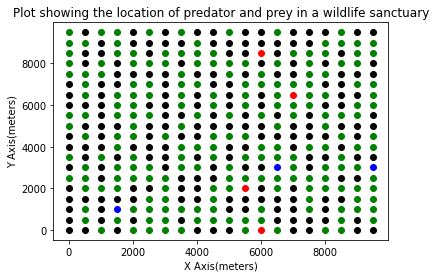

510
7


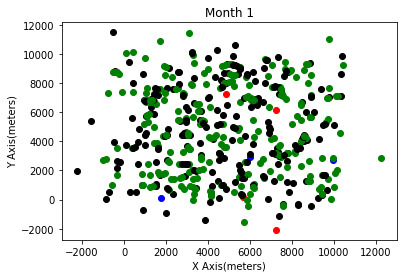

680
7


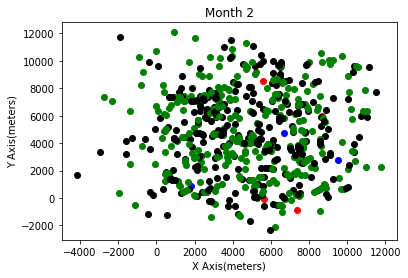

909
7


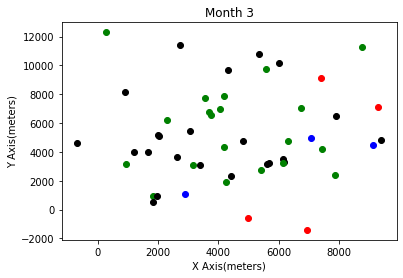

44
7


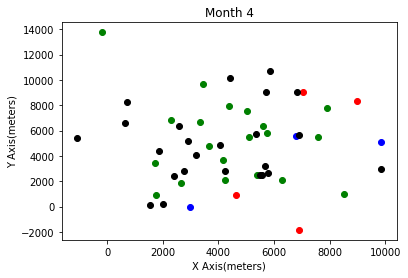

45
7


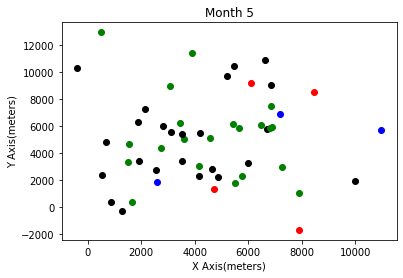

48
7


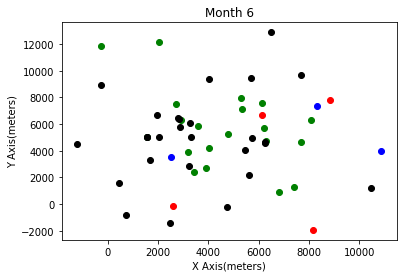

47
7


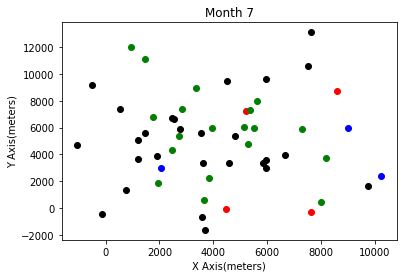

48
7


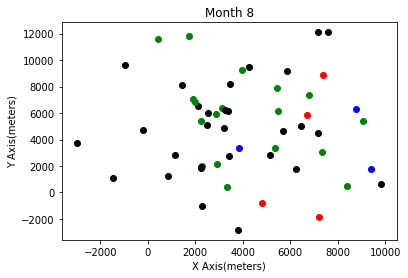

50
7


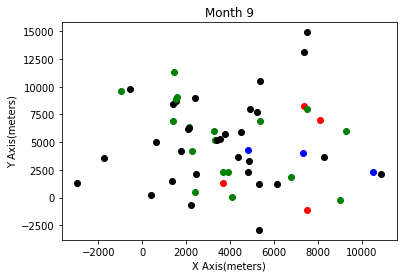

50
7


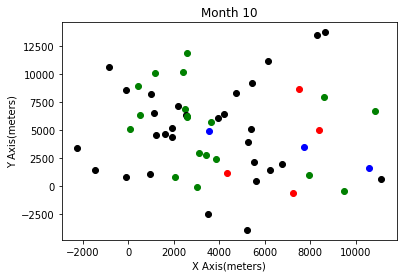

51
7


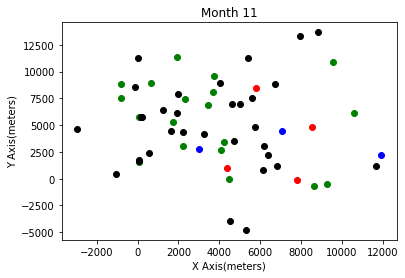

51
7


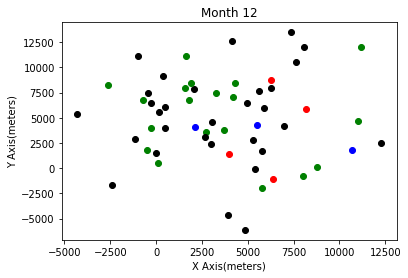

53
7


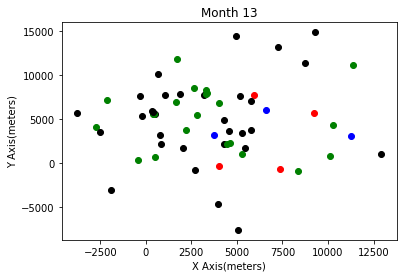

54
7


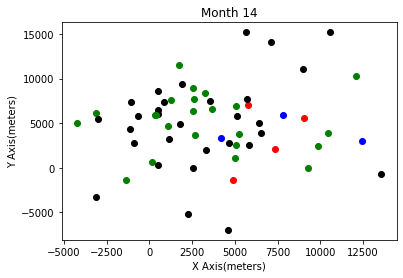

54
7


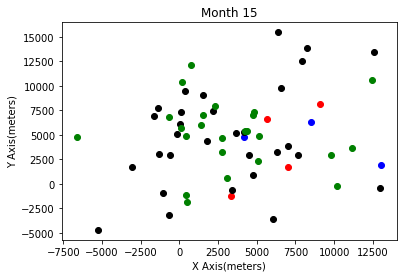

57
7


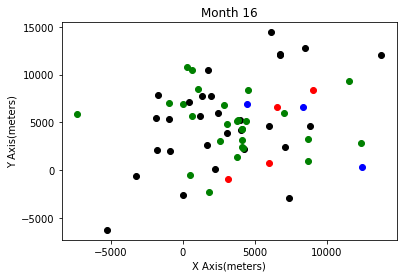

59
7


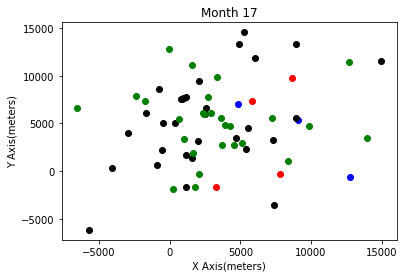

60
7


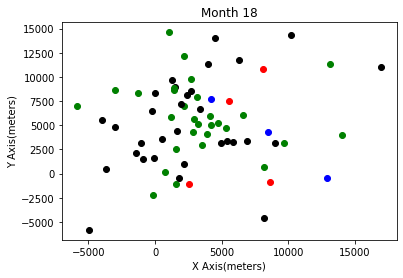

60
7


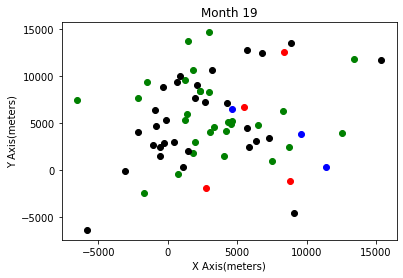

59
7


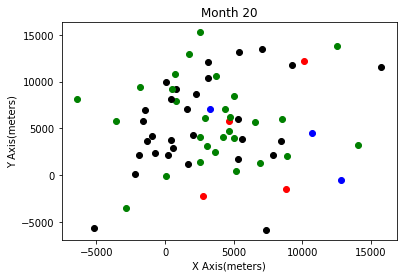

59
7


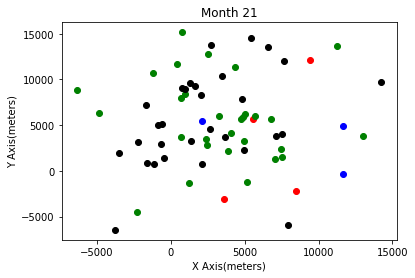

59
7


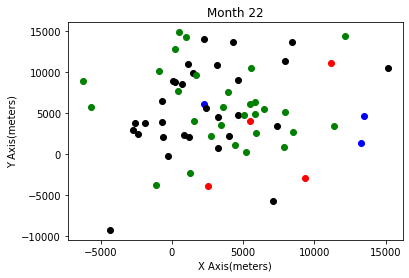

60
7


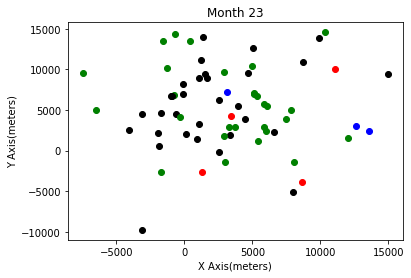

59
7


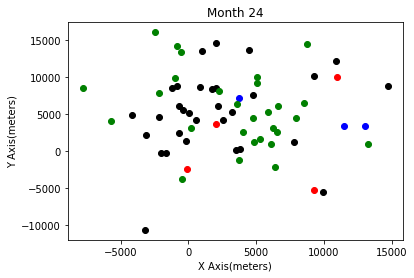

60
7


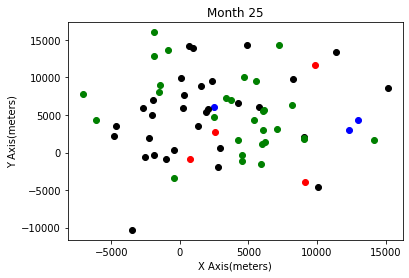

60
7


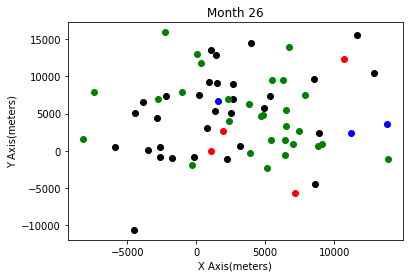

60
7


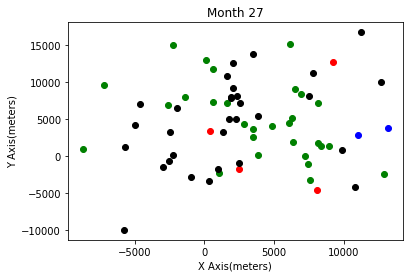

63
6


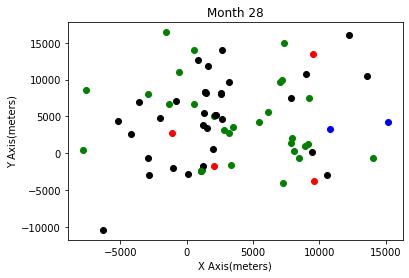

63
6


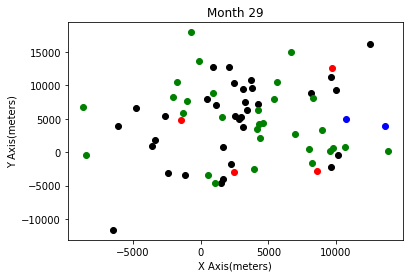

65
6


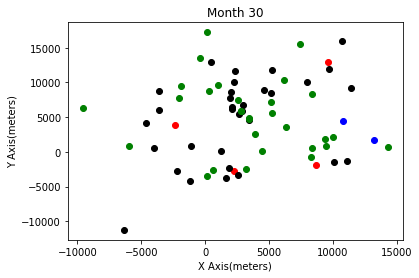

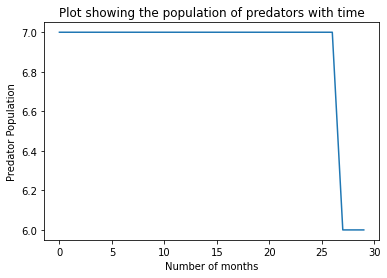

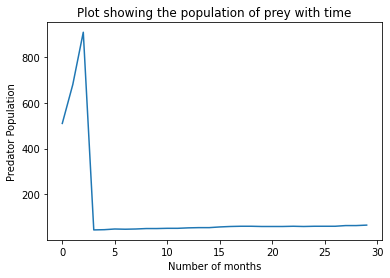

In [6]:
predator_x_coordinates=[]
predator_y_coordinates=[]
predator_gender=[]
predator_days_without_food=[]
prey_x_coordinates=[]
prey_y_coordinates=[]
prey_gender=[]
for i in range(20):
  for j in range(20):
    random=np.random.uniform(0,1)
    if(random<0.02):
      predator_x_coordinates.append(500*i) 
      predator_y_coordinates.append(500*j)
      gender=np.random.uniform(0,1)
      predator_days_without_food.append(0)
      if(gender>0.5):
        predator_gender.append('male')
      else:
        predator_gender.append('female')
    else:
      prey_x_coordinates.append(500*i)
      prey_y_coordinates.append(500*j)
      gender=np.random.uniform(0,1) 
      if(gender>0.5):
        prey_gender.append('male')
      else:
        prey_gender.append('female')

for i in range(len(predator_x_coordinates)):
  if(predator_gender[i]=='male'):
    plt.scatter(predator_x_coordinates[i],predator_y_coordinates[i],color='b')
  else:
    plt.scatter(predator_x_coordinates[i],predator_y_coordinates[i],color='r')

for i in range(len(prey_x_coordinates)):
  if(prey_gender[i]=='male'):
    plt.scatter(prey_x_coordinates[i],prey_y_coordinates[i],color='g')
  else:
    plt.scatter(prey_x_coordinates[i],prey_y_coordinates[i],color='k')
plt.title('Plot showing the location of predator and prey in a wildlife sanctuary')
plt.xlabel('X Axis(meters)')
plt.ylabel('Y Axis(meters)')
plt.show()

time=30
t=[]
num_predator=[]
num_prey=[]
for i in range(time):
  t.append(i)
for i in range(time):

  #Movement of prerdator and prey within the wildlife sanctuary.
  for j in range(len(predator_x_coordinates)):
    if(predator_gender[j]!='dead'):
      predator_x_coordinates[j]=predator_x_coordinates[j]+np.random.normal(0,1000)
      predator_y_coordinates[j]=predator_y_coordinates[j]+np.random.normal(0,1000)
      predator_days_without_food[j]=predator_days_without_food[j]+1
  for j in range(len(prey_x_coordinates)):
    if(prey_gender[j]!='dead'):
      prey_x_coordinates[j]=prey_x_coordinates[j]+np.random.normal(0,1000)
      prey_y_coordinates[j]=prey_y_coordinates[j]+np.random.normal(0,1000)

  #New individuals of the predator are born due to mating.
  new_predators_x_coordinates=[]
  new_predators_y_coordinates=[]
  new_predators_gender=[]
  new_predators_days_without_food=[]
  for j in range(len(predator_x_coordinates)):
    for k in range(j):
      if((predator_x_coordinates[j]-predator_x_coordinates[k])**2+(predator_y_coordinates[j]-predator_y_coordinates[k])**2 < 300000) and ((predator_gender[j]=='male' and predator_gender[k]=='female') or (predator_gender[k]=='male' and predator_gender[j]=='female')):
        mating=np.random.uniform(0,1)
        if(mating<1): #If a male and female meet, they mate with a certain probability.
          new_predators_x_coordinates.append((predator_x_coordinates[j]+predator_x_coordinates[k])/2)
          new_predators_y_coordinates.append((predator_y_coordinates[j]+predator_y_coordinates[k])/2)
          new_predators_days_without_food.append(0)
          gender=np.random.uniform(0,1)
          if(gender>0.5):
            new_predators_gender.append('male')
          else:
            new_predators_gender.append('female')
  for j in range(len(new_predators_x_coordinates)):
    predator_x_coordinates.append(new_predators_x_coordinates[j])
    predator_y_coordinates.append(new_predators_y_coordinates[j])
    predator_gender.append(new_predators_gender[j])
    predator_days_without_food.append(0)
  
  #Predators die due to natural factors or human factors with a probability of 0.1.
  for j in range(len(predator_x_coordinates)):
    death=np.random.uniform(0,1)
    if(death<0.00000001 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
      predator_gender[j]='dead'

  #New individuals of the prey are born due to mating.
  new_prey_x_coordinates=[]
  new_prey_y_coordinates=[]
  new_prey_gender=[]
  for j in range(len(prey_x_coordinates)):
    for k in range(j):
      if((prey_x_coordinates[j]-prey_x_coordinates[k])**2+(prey_y_coordinates[j]-prey_y_coordinates[k])**2 < 100000) and ((prey_gender[j]=='male' and prey_gender[k]=='female') or (prey_gender[k]=='male' and prey_gender[j]=='female')):
        mating=np.random.uniform(0,1)
        if(mating<1):  #If a male and female meet, they mate with a certain probability.
          new_prey_x_coordinates.append((prey_x_coordinates[j]+prey_x_coordinates[k])/2)
          new_prey_y_coordinates.append((prey_y_coordinates[j]+prey_y_coordinates[k])/2)
          gender=np.random.uniform(0,1)
          if(gender>0.5):
            new_prey_gender.append('male')
          else:
            new_prey_gender.append('female')
  for j in range(len(new_prey_x_coordinates)):
    prey_x_coordinates.append(new_prey_x_coordinates[j])
    prey_y_coordinates.append(new_prey_y_coordinates[j])
    prey_gender.append(new_prey_gender[j])

  count_prey=0
  for j in range(len(prey_x_coordinates)):
    if((prey_gender[j]=='male' or prey_gender[j]=='female')):
      count_prey=count_prey+1

  count_predator=0
  for j in range(len(predator_x_coordinates)):
    if((predator_gender[j]=='male' or predator_gender[j]=='female')):
      count_predator=count_predator+1

  print(count_prey)
  print(count_predator)
  #Prey die due to natural factors or human factors with a probability of 0.1.
  for j in range(len(prey_x_coordinates)):
    if(count_prey>850):
      death=np.random.uniform(0,1)
      if(death<0.95 and (prey_gender[j]=='male' or prey_gender[j]=='female')):
        prey_gender[j]='dead'
    else:
      death=np.random.uniform(0,1)
      if(death<0.00000001 and (prey_gender[j]=='male' or prey_gender[j]=='female')):
        prey_gender[j]='dead'
  
  num_predator.append(count_predator)
  num_prey.append(count_prey)

  #Predators die due to natural factors or human factors with a probability of 0.1.
  for j in range(len(predator_x_coordinates)):
    if(count_predator>70):
      death=np.random.uniform(0,1)
      if(death<0.95 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
        predator_gender[j]='dead'
    else:
      death=np.random.uniform(0,1)
      if(death<0.00000001 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
        predator_gender[j]='dead'  

  #Prey die due to attack from predator with a probability of 0.9.
  for j in range(len(predator_x_coordinates)):
    for k in range(len(prey_x_coordinates)):
      if (predator_x_coordinates[j]-prey_x_coordinates[k])**2+(predator_y_coordinates[j]-prey_y_coordinates[k])**2 < 500000:
        death=np.random.uniform(0,1)
        if(death<0.4 and (prey_gender[k]=='male' or prey_gender[k]=='female')):
          prey_gender[k]='dead'
          predator_days_without_food[j]=0
  
  for j in range(len(predator_x_coordinates)):
    if(predator_days_without_food[j]==4 and (predator_gender[j]=='male' or predator_gender[j]=='female')):
      starve=np.random.uniform(0,1)
      if(starve<0.1):
        predator_gender[j]='dead'
  
  for j in range(len(predator_x_coordinates)):
    if(predator_gender[j]=='male'):
      plt.scatter(predator_x_coordinates[j],predator_y_coordinates[j],color='b')
    if(predator_gender[j]=='female'):
      plt.scatter(predator_x_coordinates[j],predator_y_coordinates[j],color='r')
    
  for j in range(len(prey_x_coordinates)):
    if(prey_gender[j]=='male'):
      plt.scatter(prey_x_coordinates[j],prey_y_coordinates[j],color='g')
    if(prey_gender[j]=='female'):
      plt.scatter(prey_x_coordinates[j],prey_y_coordinates[j],color='k')

  plt.title('Month '+str(i+1))
  plt.xlabel('X Axis(meters)')
  plt.ylabel('Y Axis(meters)')
  plt.show()

plt.plot(t,num_predator)
plt.xlabel('Number of months')
plt.ylabel('Predator Population')
plt.title('Plot showing the population of predators with time')
plt.show()
plt.plot(t,num_prey)
plt.xlabel('Number of months')
plt.ylabel('Predator Population')
plt.title('Plot showing the population of prey with time')
plt.show()